# 📊 Ethereum Transaction Network Analysis

# Load libraries and data

In [10]:
import pickle
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [11]:
# Đường dẫn tới file đồ thị
file_path = '/home/ducanhhh/Dynamic_Feature-main/Dynamic_Feature-main/Dataset/MulDiGraph.pkl'

# Load MultiDiGraph từ file pickle
with open(file_path, 'rb') as f:
    G = pickle.load(f)

print(f"Is MultiDiGraph: {isinstance(G, nx.MultiDiGraph)}")
print(f"Tổng số nodes: {G.number_of_nodes()}")
print(f"Tổng số edges: {G.number_of_edges()}")

Is MultiDiGraph: True
Tổng số nodes: 2973489
Tổng số edges: 13551303


In [12]:
labels = nx.get_node_attributes(G, 'isp')
label_counts = Counter(labels.values())

print(f"Phishing: {label_counts.get(1, 0)}")
print(f"Normal:   {label_counts.get(0, 0)}")
print(f"Unknown:  {G.number_of_nodes() - sum(label_counts.values())}")

Phishing: 1165
Normal:   2972324
Unknown:  0


In [13]:
print("\n5 giao dịch đầu tiên:")
for i, (u, v, k, d) in enumerate(G.edges(data=True, keys=True)):
    if i >= 5:
        break
    print(f"{i}: {u} -> {v}, data: {d}")


5 giao dịch đầu tiên:
0: 0x1f1e784a61a8ca0a90250bcd2170696655b28a21 -> 0x1266f8b9e4dffc9e2f719bf51713f7e714516861, data: {'amount': 2.3446233, 'timestamp': 1526454086.0}
1: 0x1f1e784a61a8ca0a90250bcd2170696655b28a21 -> 0x806ceb189d36700a97f4e7ecd4fb6c95f2c5a3de, data: {'amount': 0.07, 'timestamp': 1504461965.0}
2: 0x1f1e784a61a8ca0a90250bcd2170696655b28a21 -> 0x806ceb189d36700a97f4e7ecd4fb6c95f2c5a3de, data: {'amount': 0.052111, 'timestamp': 1504473420.0}
3: 0x1f1e784a61a8ca0a90250bcd2170696655b28a21 -> 0x3ec4688db6bf8464b0bef30ec2ca7afc7fa7863c, data: {'amount': 5.06854256, 'timestamp': 1507806219.0}
4: 0x1f1e784a61a8ca0a90250bcd2170696655b28a21 -> 0x3ec4688db6bf8464b0bef30ec2ca7afc7fa7863c, data: {'amount': 0.9925, 'timestamp': 1527097014.0}


# Degree Distribution

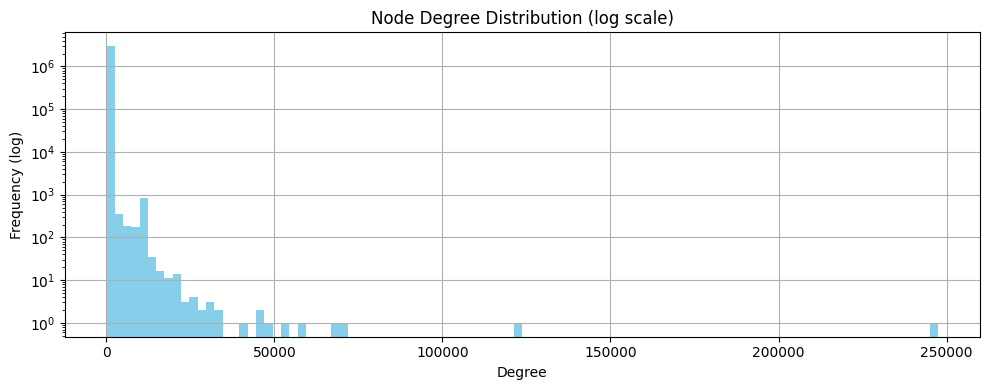

In [14]:
degrees = dict(G.degree())
degree_values = list(degrees.values())

plt.figure(figsize=(10, 4))
plt.hist(degree_values, bins=100, log=True, color='skyblue')
plt.title("Node Degree Distribution (log scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency (log)")
plt.grid(True)
plt.tight_layout()
plt.savefig("degree_distribution.png")
plt.show()


# Average Degree by Class

In [15]:
phishing_nodes = [n for n, d in G.nodes(data=True) if d.get('isp') == 1]
normal_nodes = [n for n, d in G.nodes(data=True) if d.get('isp') == 0]

phishing_degrees = [G.degree(n) for n in phishing_nodes]
normal_degrees = [G.degree(n) for n in normal_nodes]

print("Avg degree (phishing):", sum(phishing_degrees) / len(phishing_degrees))
print("Avg degree (normal):", sum(normal_degrees) / len(normal_degrees))

Avg degree (phishing): 51.72532188841202
Avg degree (normal): 9.098047857501403


# Daily Transaction Volume Over Time

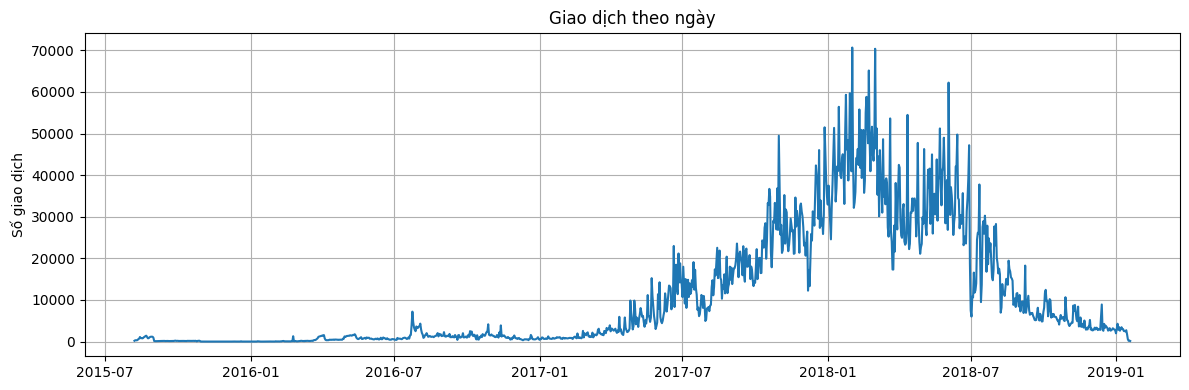

In [16]:
timestamps = [data['timestamp'] for _, _, data in G.edges(data=True) if 'timestamp' in data]
dates = [datetime.datetime.fromtimestamp(ts).date() for ts in timestamps]

df = pd.Series(dates).value_counts().sort_index()
df.plot(kind='line', figsize=(12, 4), title='Giao dịch theo ngày')
plt.ylabel("Số giao dịch")
plt.grid(True)
plt.tight_layout()
plt.show()

# Node Centrality

In [17]:
top_out = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:10]
top_in = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 out-degree nodes (gửi nhiều nhất):")
print(top_out)

print("Top 10 in-degree nodes (nhận nhiều nhất):")
print(top_in)

Top 10 out-degree nodes (gửi nhiều nhất):
[('0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98', 102480), ('0xea674fdde714fd979de3edf0f56aa9716b898ec8', 67183), ('0x2b5634c42055806a59e9107ed44d43c426e58258', 67031), ('0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be', 56124), ('0x5e575279bf9f4acf0a130c186861454247394c06', 48570), ('0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', 46971), ('0x2984581ece53a4390d1f568673cf693139c97049', 46602), ('0x4b01721f0244e7c5b5f63c20942850e447f5a5ee', 38732), ('0x59a5208b32e627891c389ebafc644145224006e8', 32052), ('0xe03c23519e18d64f144d2800e30e81b0065c48b5', 24620)]
Top 10 in-degree nodes (nhận nhiều nhất):
[('0x8d12a197cb00d4747a1fe03395095ce2a5cc6819', 227397), ('0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208', 34048), ('0x86fa049857e0209aa7d9e616f7eb3b3b78ecfdb0', 27062), ('0xf230b790e05390fc8295f4d3f60332c93bed42e2', 23937), ('0x1a95b271b0535d15fa49932daba31ba612b52946', 22117), ('0x45555629aabfea138ead1c1e5f2ac3cce2add830', 22072), ('0xfbb1b73c4f0bda4f67dca266ce6e

# Advanced Centrality Measures (PageRank)

In [18]:
pagerank_scores = nx.pagerank(G)
top_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 PageRank nodes:")
for addr, score in top_pagerank:
    print(f"{addr}: {score:.6f}")

Top 10 PageRank nodes:
0xa12431d0b9db640034b0cdfceef9cce161e62be4: 0.002650
0xe0b073976d45e6ecc4ec13633c5ac5d9bbe5016f: 0.002626
0x65e2c5175e2e618f48e70343b14c31b280e42d90: 0.002407
0x876eabf441b2ee5b5b0554fd502a8e0600950cfa: 0.002382
0x503f9794d6a6bb0df8fbb19a2b3e2aeab35339ad: 0.002342
0xeb9a4b185816c354db92db09cc3b50be60b901b6: 0.002285
0xd42debe4edc92bd5a3fbb4243e1eccf6d63a4a5d: 0.002273
0xefcec6d87e3ce625c90865a49f2b7482963d73fe: 0.002183
0x05d412ce18f24040bb3fa45cf2c69e506586d8e8: 0.002136
0x9b4e2b4b13d125238aa0480dd42b4f6fc71b37cc: 0.002129


# Export Features to DataFrame

In [19]:
df_features = pd.DataFrame([
    {"address": n, "degree": G.degree(n), "in_degree": G.in_degree(n),
     "out_degree": G.out_degree(n), "pagerank": pagerank_scores.get(n, 0),
     "label": G.nodes[n].get("isp", -1)}
    for n in G.nodes
])
df_features.head()

,address,degree,in_degree,out_degree,pagerank,label
0,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,1839,215,1624,6.168217e-07,0
1,0x1266f8b9e4dffc9e2f719bf51713f7e714516861,2,1,1,1.333369e-07,0
2,0xbbfaf27674c2eb5d13edc58a40081248d13dcfeb,8,8,0,8.449769e-07,1
3,0x256fc19e9d8f5be0d451841f218289d1adbbaaa3,1,0,1,1.331609e-07,0
4,0xb50d0c4cb2c29cc232c96a59e9c65eb82914ec75,229,63,166,8.827056e-07,0
